# Importing the necessary libraries

In [433]:
import pandas as pd    
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading file 

In [434]:
df = pd.read_csv('Motor_data.csv',  encoding='latin1') # put file path with suitable encoding format (latin1)
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,12/14/2021,8:13,BROOKLYN,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
1,12/14/2021,14:58,MANHATTAN,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,12/14/2021,16:50,QUEENS,40.675884,-73.755770,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4487127,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,12/14/2021,23:10,QUEENS,40.666840,-73.789410,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4486635,Sedan,Sedan,NaN,NaN,NaN
4,12/11/2021,19:43,BRONX,40.872620,-73.904686,"(40.87262, -73.904686)",WEST KINGSBRIDGE ROAD,HEATH AVENUE,NaN,1.0,...,Unspecified,NaN,NaN,NaN,4487040,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427441,9/4/2016,15:00,BRONX,40.828125,-73.841050,"(40.828125, -73.84105)",BRUCKNER BOULEVARD,BRUSH AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3518484,Sedan,Sedan,NaN,NaN,NaN
427442,8/30/2016,22:25,MANHATTAN,NaN,NaN,NaN,WEST 79 STREET,RIVERSIDE DRIVE,NaN,1.0,...,NaN,NaN,NaN,NaN,3533300,Bike,NaN,NaN,NaN,NaN
427443,9/5/2016,7:20,BROOKLYN,40.676250,-73.953080,"(40.67625, -73.95308)",BEDFORD AVENUE,BERGEN STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3516161,Sedan,NaN,NaN,NaN,NaN
427444,9/8/2016,10:10,BRONX,40.820650,-73.917725,"(40.82065, -73.917725)",COURTLANDT AVENUE,EAST 155 STREET,NaN,1.0,...,Unspecified,NaN,NaN,NaN,3515928,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


# Sampling 3% of dataset

In [435]:
df = df.sample(frac=0.03) # 3% of dataset are sampeled
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
63227,2/24/2021,16:50,QUEENS,40.673443,-73.744200,"(40.673443, -73.7442)",228 STREET,137 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4394345,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
406923,11/13/2016,20:00,STATEN ISLAND,40.624940,-74.078545,"(40.62494, -74.078545)",BROAD STREET,QUINN STREET,NaN,1.0,...,NaN,NaN,NaN,NaN,3560486,Sedan,NaN,NaN,NaN,NaN
425822,8/20/2016,14:23,QUEENS,40.734960,-73.938570,"(40.73496, -73.93857)",35 STREET,REVIEW AVENUE,NaN,0.0,...,Unspecified,Unspecified,NaN,NaN,3504896,Sedan,Pick-up Truck,Sedan,NaN,NaN
133046,10/23/2019,17:00,QUEENS,40.721060,-73.759450,"(40.72106, -73.75945)",HILLSIDE AVENUE,FRANCIS LEWIS BOULEVARD,NaN,1.0,...,NaN,NaN,NaN,NaN,4228322,Sedan,NaN,NaN,NaN,NaN
75565,12/1/2020,0:25,BROOKLYN,40.599632,-73.933960,"(40.599632, -73.93396)",KNAPP STREET,AVENUE V,NaN,0.0,...,NaN,NaN,NaN,NaN,4372099,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376055,3/19/2017,18:00,BRONX,40.831768,-73.908030,"(40.831768, -73.90803)",PARK AVENUE,EAST 168 STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3635256,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
325996,10/16/2017,9:55,QUEENS,0.000000,0.000000,"(0.0, 0.0)",HAIGHT STREET,SANFORD AVENUE,NaN,0.0,...,NaN,NaN,NaN,NaN,3770343,Sedan,NaN,NaN,NaN,NaN
154018,7/28/2019,2:10,QUEENS,40.755850,-73.882590,"(40.75585, -73.88259)",NORTHERN BOULEVARD,85 STREET,NaN,0.0,...,Turning Improperly,NaN,NaN,NaN,4178151,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
208676,12/14/2018,12:23,QUEENS,40.761375,-73.810450,"(40.761375, -73.81045)",SANFORD AVENUE,155 STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4044638,Sedan,Sedan,NaN,NaN,NaN


# Dropping unnecessary features(columns)

In [436]:
df = df.drop(['LOCATION', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4' 
            , 'CONTRIBUTING FACTOR VEHICLE 5' , 'COLLISION_ID' , 'VEHICLE TYPE CODE 3'
            , 'VEHICLE TYPE CODE 4'], axis=1) # dropping unncessary columns in between data
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 5
63227,2/24/2021,16:50,QUEENS,40.673443,-73.744200,228 STREET,137 AVENUE,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN
406923,11/13/2016,20:00,STATEN ISLAND,40.624940,-74.078545,BROAD STREET,QUINN STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,Sedan,NaN,NaN
425822,8/20/2016,14:23,QUEENS,40.734960,-73.938570,35 STREET,REVIEW AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck,NaN
133046,10/23/2019,17:00,QUEENS,40.721060,-73.759450,HILLSIDE AVENUE,FRANCIS LEWIS BOULEVARD,1.0,0.0,0,0,0,0,1,0,Glare,NaN,Sedan,NaN,NaN
75565,12/1/2020,0:25,BROOKLYN,40.599632,-73.933960,KNAPP STREET,AVENUE V,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376055,3/19/2017,18:00,BRONX,40.831768,-73.908030,PARK AVENUE,EAST 168 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,NaN
325996,10/16/2017,9:55,QUEENS,0.000000,0.000000,HAIGHT STREET,SANFORD AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,Sedan,NaN,NaN
154018,7/28/2019,2:10,QUEENS,40.755850,-73.882590,NORTHERN BOULEVARD,85 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle,NaN
208676,12/14/2018,12:23,QUEENS,40.761375,-73.810450,SANFORD AVENUE,155 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan,NaN


In [437]:
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True) # dropping the last column
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
63227,2/24/2021,16:50,QUEENS,40.673443,-73.744200,228 STREET,137 AVENUE,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
406923,11/13/2016,20:00,STATEN ISLAND,40.624940,-74.078545,BROAD STREET,QUINN STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,Sedan,NaN
425822,8/20/2016,14:23,QUEENS,40.734960,-73.938570,35 STREET,REVIEW AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck
133046,10/23/2019,17:00,QUEENS,40.721060,-73.759450,HILLSIDE AVENUE,FRANCIS LEWIS BOULEVARD,1.0,0.0,0,0,0,0,1,0,Glare,NaN,Sedan,NaN
75565,12/1/2020,0:25,BROOKLYN,40.599632,-73.933960,KNAPP STREET,AVENUE V,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376055,3/19/2017,18:00,BRONX,40.831768,-73.908030,PARK AVENUE,EAST 168 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
325996,10/16/2017,9:55,QUEENS,0.000000,0.000000,HAIGHT STREET,SANFORD AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,Sedan,NaN
154018,7/28/2019,2:10,QUEENS,40.755850,-73.882590,NORTHERN BOULEVARD,85 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle
208676,12/14/2018,12:23,QUEENS,40.761375,-73.810450,SANFORD AVENUE,155 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan


# Dealing with missing values

In [438]:
count_nan = df.isnull().sum() # counting the number of missing values (NANs) in each columns (we want to lead them into zeros.)
count_nan

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                             0
LATITUDE                          483
LONGITUDE                         483
ON STREET NAME                      0
CROSS STREET NAME                  15
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      54
CONTRIBUTING FACTOR VEHICLE 2    2098
VEHICLE TYPE CODE 1               129
VEHICLE TYPE CODE 2              2878
dtype: int64

In [439]:
df.dtypes # knowing the data type for each column to determine ways to deal with missing values in each of them

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
LATITUDE                         float64
LONGITUDE                        float64
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
dtype: object

In [440]:
df = df.fillna(df.mean()) # we will replace missing values in numerical columns with the mean (AVG) of each column
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
63227,2/24/2021,16:50,QUEENS,40.673443,-73.744200,228 STREET,137 AVENUE,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
406923,11/13/2016,20:00,STATEN ISLAND,40.624940,-74.078545,BROAD STREET,QUINN STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,Sedan,NaN
425822,8/20/2016,14:23,QUEENS,40.734960,-73.938570,35 STREET,REVIEW AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck
133046,10/23/2019,17:00,QUEENS,40.721060,-73.759450,HILLSIDE AVENUE,FRANCIS LEWIS BOULEVARD,1.0,0.0,0,0,0,0,1,0,Glare,NaN,Sedan,NaN
75565,12/1/2020,0:25,BROOKLYN,40.599632,-73.933960,KNAPP STREET,AVENUE V,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376055,3/19/2017,18:00,BRONX,40.831768,-73.908030,PARK AVENUE,EAST 168 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
325996,10/16/2017,9:55,QUEENS,0.000000,0.000000,HAIGHT STREET,SANFORD AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,Sedan,NaN
154018,7/28/2019,2:10,QUEENS,40.755850,-73.882590,NORTHERN BOULEVARD,85 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle
208676,12/14/2018,12:23,QUEENS,40.761375,-73.810450,SANFORD AVENUE,155 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan


In [441]:
count_nan = df.isnull().sum() # counting again and noticing that there're no missing values in any numerical columns
count_nan

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                             0
LATITUDE                            0
LONGITUDE                           0
ON STREET NAME                      0
CROSS STREET NAME                  15
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      54
CONTRIBUTING FACTOR VEHICLE 2    2098
VEHICLE TYPE CODE 1               129
VEHICLE TYPE CODE 2              2878
dtype: int64

In [442]:
# We will drop all rows(records) that contain missing values in its column (cross street name)
# It's few records so we removed them fromm the data
df = df.dropna(subset=['CROSS STREET NAME']) 
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
63227,2/24/2021,16:50,QUEENS,40.673443,-73.744200,228 STREET,137 AVENUE,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
406923,11/13/2016,20:00,STATEN ISLAND,40.624940,-74.078545,BROAD STREET,QUINN STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,Sedan,NaN
425822,8/20/2016,14:23,QUEENS,40.734960,-73.938570,35 STREET,REVIEW AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck
133046,10/23/2019,17:00,QUEENS,40.721060,-73.759450,HILLSIDE AVENUE,FRANCIS LEWIS BOULEVARD,1.0,0.0,0,0,0,0,1,0,Glare,NaN,Sedan,NaN
75565,12/1/2020,0:25,BROOKLYN,40.599632,-73.933960,KNAPP STREET,AVENUE V,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,Station Wagon/Sport Utility Vehicle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376055,3/19/2017,18:00,BRONX,40.831768,-73.908030,PARK AVENUE,EAST 168 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
325996,10/16/2017,9:55,QUEENS,0.000000,0.000000,HAIGHT STREET,SANFORD AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,Sedan,NaN
154018,7/28/2019,2:10,QUEENS,40.755850,-73.882590,NORTHERN BOULEVARD,85 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle
208676,12/14/2018,12:23,QUEENS,40.761375,-73.810450,SANFORD AVENUE,155 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan


In [443]:
# Counting NaN values after 
count_nan = df.isnull().sum()  # counting again and noticing that there're no missing values in cross street name column
count_nan

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                             0
LATITUDE                            0
LONGITUDE                           0
ON STREET NAME                      0
CROSS STREET NAME                   0
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      54
CONTRIBUTING FACTOR VEHICLE 2    2094
VEHICLE TYPE CODE 1               129
VEHICLE TYPE CODE 2              2874
dtype: int64

In [444]:
# We will replace missing values in both columns (CONTRIBUTING FACTOR VEHICLE 1 , CONTRIBUTING FACTOR VEHICLE 2) with (Unspecified)
columns_to_fill = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']
df[columns_to_fill] = df[columns_to_fill].fillna('Unspecified') 
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
63227,2/24/2021,16:50,QUEENS,40.673443,-73.744200,228 STREET,137 AVENUE,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
406923,11/13/2016,20:00,STATEN ISLAND,40.624940,-74.078545,BROAD STREET,QUINN STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,Unspecified,Sedan,NaN
425822,8/20/2016,14:23,QUEENS,40.734960,-73.938570,35 STREET,REVIEW AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck
133046,10/23/2019,17:00,QUEENS,40.721060,-73.759450,HILLSIDE AVENUE,FRANCIS LEWIS BOULEVARD,1.0,0.0,0,0,0,0,1,0,Glare,Unspecified,Sedan,NaN
75565,12/1/2020,0:25,BROOKLYN,40.599632,-73.933960,KNAPP STREET,AVENUE V,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376055,3/19/2017,18:00,BRONX,40.831768,-73.908030,PARK AVENUE,EAST 168 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
325996,10/16/2017,9:55,QUEENS,0.000000,0.000000,HAIGHT STREET,SANFORD AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Sedan,NaN
154018,7/28/2019,2:10,QUEENS,40.755850,-73.882590,NORTHERN BOULEVARD,85 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle
208676,12/14/2018,12:23,QUEENS,40.761375,-73.810450,SANFORD AVENUE,155 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan


In [445]:
# We will replace missing values in both columns (VEHICLE TYPE CODE 1 , VEHICLE TYPE CODE 2) with (None)
columns_to_fill = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']
df[columns_to_fill] = df[columns_to_fill].fillna('None')
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
63227,2/24/2021,16:50,QUEENS,40.673443,-73.744200,228 STREET,137 AVENUE,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
406923,11/13/2016,20:00,STATEN ISLAND,40.624940,-74.078545,BROAD STREET,QUINN STREET,1.0,0.0,1,0,0,0,0,0,Unspecified,Unspecified,Sedan,None
425822,8/20/2016,14:23,QUEENS,40.734960,-73.938570,35 STREET,REVIEW AVENUE,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck
133046,10/23/2019,17:00,QUEENS,40.721060,-73.759450,HILLSIDE AVENUE,FRANCIS LEWIS BOULEVARD,1.0,0.0,0,0,0,0,1,0,Glare,Unspecified,Sedan,None
75565,12/1/2020,0:25,BROOKLYN,40.599632,-73.933960,KNAPP STREET,AVENUE V,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376055,3/19/2017,18:00,BRONX,40.831768,-73.908030,PARK AVENUE,EAST 168 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
325996,10/16/2017,9:55,QUEENS,0.000000,0.000000,HAIGHT STREET,SANFORD AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Sedan,None
154018,7/28/2019,2:10,QUEENS,40.755850,-73.882590,NORTHERN BOULEVARD,85 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle
208676,12/14/2018,12:23,QUEENS,40.761375,-73.810450,SANFORD AVENUE,155 STREET,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan


In [446]:
count_nan = df.isnull().sum() # counting again and noticing that we handeled all missing values   
count_nan

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
dtype: int64

In [447]:
# Lowering to prevent duplicates caused by the user
df['ON STREET NAME'] = df['ON STREET NAME'].str.lower()
df['CROSS STREET NAME'] = df['CROSS STREET NAME'].str.lower()

# Changing the types ti its suitable ones
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME']).dt.hour

df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].astype(int)
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].astype(int)

# Sorting by date
df_sorted = df.sort_values(by='CRASH DATE')
df_sorted

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
398166,2016-03-22,11,MANHATTAN,40.578487,-73.658229,west 42 street,11 avenue,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,None,None
392166,2016-05-03,6,BRONX,40.578487,-73.658229,bedford park boulevard,southern boulevard,0,0,0,0,0,0,0,0,Unspecified,Unspecified,4 dr sedan,4 dr sedan
424820,2016-08-20,16,BRONX,40.812954,-73.913720,saint anns avenue,east 147 street,1,0,0,0,1,0,0,0,Failure to Yield Right-of-Way,Unspecified,Bike,None
425822,2016-08-20,14,QUEENS,40.734960,-73.938570,35 street,review avenue,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Pick-up Truck
427091,2016-08-20,10,BROOKLYN,40.684050,-73.977460,flatbush avenue,atlantic avenue,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,Sedan,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60846,2022-09-03,14,QUEENS,40.756794,-73.894135,32 avenue,73 street,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,Moped
408795,2022-09-10,22,BROOKLYN,40.668507,-73.925610,buffalo avenue,eastern parkway,2,0,0,0,0,0,2,0,Unspecified,Unspecified,Sedan,None
142488,2022-10-03,19,BRONX,40.814934,-73.914960,east 149 street,brook avenue,1,0,1,0,0,0,0,0,Unspecified,Unspecified,None,None
388139,2022-12-10,20,BROOKLYN,40.658497,-73.904000,lott avenue,stone avenue,0,0,0,0,0,0,0,0,Unspecified,Unspecified,Sedan,None


# Normalization

In [448]:
object_columns=['CONTRIBUTING FACTOR VEHICLE 1' , 
                'CONTRIBUTING FACTOR VEHICLE 2' , 'VEHICLE TYPE CODE 1' , 'VEHICLE TYPE CODE 2', 'ON STREET NAME', 'CROSS STREET NAME'] 

In [449]:
# we start to encode object columns into numerical values using label encoder
le = LabelEncoder ()
df[object_columns] = df[object_columns].apply(lambda x: le.fit_transform(x))   # we use apply() technique to be able to apply encoding multiple columns in the same time
df

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
63227,2021-02-24,16,QUEENS,40.673443,-73.744200,316,101,2,0,0,0,0,0,2,0,46,35,63,71
406923,2016-11-13,20,STATEN ISLAND,40.624940,-74.078545,946,2189,1,0,1,0,0,0,0,0,46,35,61,56
425822,2016-08-20,14,QUEENS,40.734960,-73.938570,395,2218,0,0,0,0,0,0,0,0,8,35,61,62
133046,2019-10-23,17,QUEENS,40.721060,-73.759450,1814,1474,1,0,0,0,0,0,1,0,17,35,61,56
75565,2020-12-01,0,BROOKLYN,40.599632,-73.933960,1937,643,0,0,0,0,0,0,0,0,46,35,63,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376055,2017-03-19,18,BRONX,40.831768,-73.908030,2287,1196,0,0,0,0,0,0,0,0,8,35,61,71
325996,2017-10-16,9,QUEENS,0.000000,0.000000,1754,2307,0,0,0,0,0,0,0,0,46,35,61,56
154018,2019-07-28,2,QUEENS,40.755850,-73.882590,2241,509,0,0,0,0,0,0,0,0,8,32,61,71
208676,2018-12-14,12,QUEENS,40.761375,-73.810450,2501,149,0,0,0,0,0,0,0,0,13,35,61,69


In [450]:
# Labeling using replace as we need the labels in graphs
borough_labels = {'BRONX': 0,
                  'BROOKLYN' : 1,
                  'MANHATTAN' : 2,
                  'QUEENS': 3,
                  'STATEN ISLAND': 4}
df['BOROUGH'] = df['BOROUGH'].replace(borough_labels)

In [451]:
modified_columns = df.columns

In [452]:
df.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                                int64
BOROUGH                                   int64
LATITUDE                                float64
LONGITUDE                               float64
ON STREET NAME                            int32
CROSS STREET NAME                         int32
NUMBER OF PERSONS INJURED                 int32
NUMBER OF PERSONS KILLED                  int32
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1             int32
CONTRIBUTING FACTOR VEHICLE 2             int32
VEHICLE TYPE CODE 1                       int32
VEHICLE TYPE CODE 2                       int32
dtype: object

# Feature Engineering

# Visualization

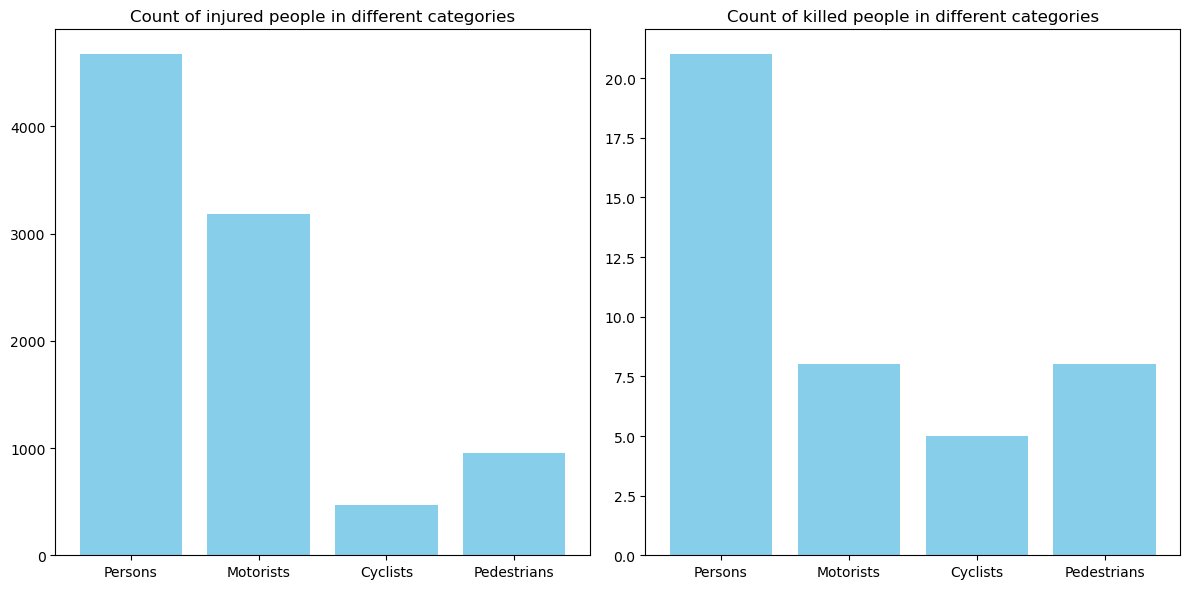

In [453]:
# Calculate the sum of each category of injured and killed people
sum_values_killed = df[['NUMBER OF PERSONS KILLED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF PEDESTRIANS KILLED']].sum()
sum_values_injured = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF PEDESTRIANS INJURED']].sum()

# Labels for each type
labels = ['Persons', 'Motorists', 'Cyclists', 'Pedestrians']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first subplot
ax1.bar(labels,
        sum_values_injured,
        color='skyblue')
ax1.set_title('Count of injured people in different categories')

# Plot the second subplot
ax2.bar(labels,
        sum_values_killed,
        color='skyblue')
ax2.set_title('Count of killed people in different categories')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()

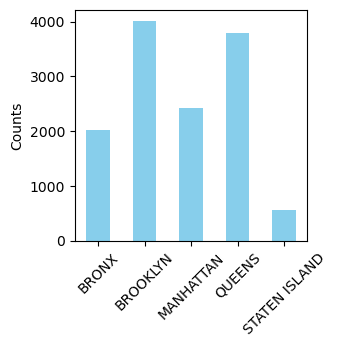

In [454]:
value_counts = df['BOROUGH'].value_counts().sort_index()
value_counts.plot(kind='bar', color='skyblue', figsize=(3,3))
plt.ylabel('Counts')
plt.xticks(range(len(value_counts.index)), borough_labels.keys(), rotation=45)
plt.show()

In [456]:
df['Year'] = pd.to_datetime(df['CRASH DATE']).dt.year

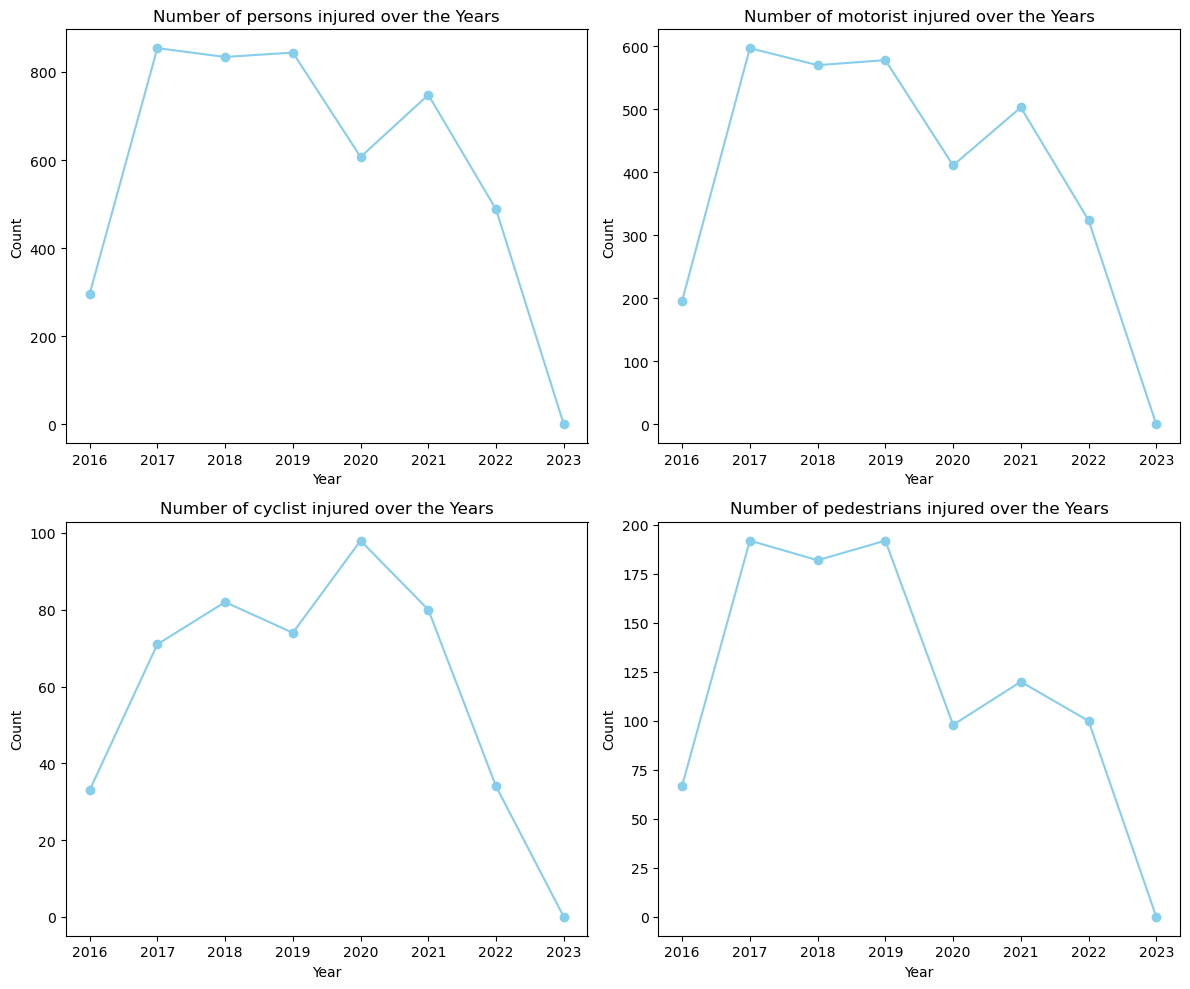

In [482]:
injured_categories = ['NUMBER OF PERSONS INJURED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF PEDESTRIANS INJURED']

grouped_data = df.groupby('Year')[injured_categories].sum()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, category in enumerate(injured_categories):
    row_index = i // 2
    col_index = i % 2
    
    axes[row_index, col_index].plot(grouped_data.index, grouped_data[category], marker='o', linestyle='-', color='skyblue')
    axes[row_index, col_index].set_title(f'{category.capitalize()} over the Years')
    axes[row_index, col_index].set_xlabel('Year')
    axes[row_index, col_index].set_ylabel('Count')

plt.tight_layout()
plt.show()

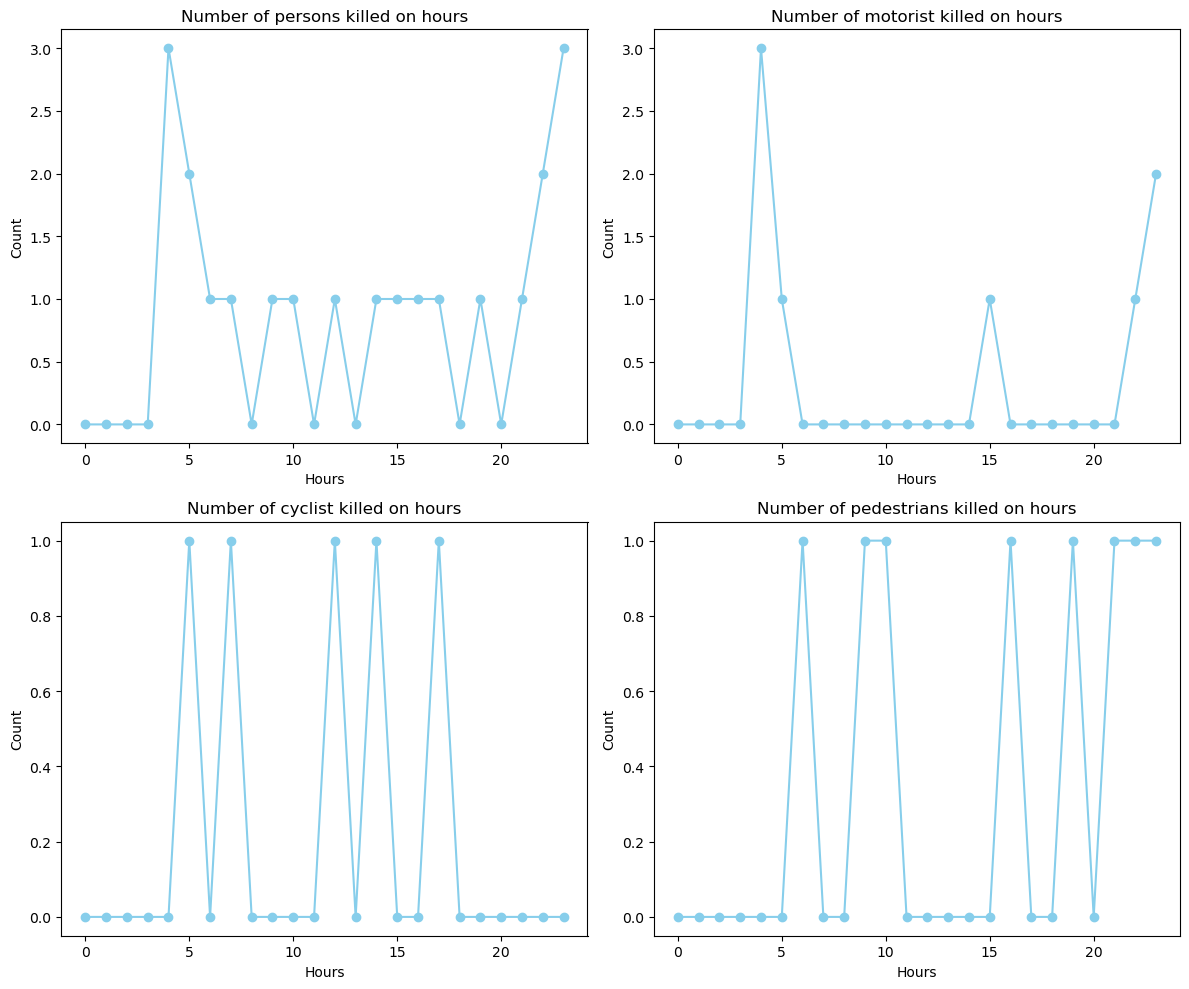

In [480]:
killed_categories = ['NUMBER OF PERSONS KILLED', 'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF PEDESTRIANS KILLED']

grouped_data = df.groupby('CRASH TIME')[killed_categories].sum()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, category in enumerate(killed_categories):
    row_index = i // 2
    col_index = i % 2
    
    axes[row_index, col_index].plot(grouped_data.index, grouped_data[category], marker='o', linestyle='-', color='skyblue')
    axes[row_index, col_index].set_title(f'{category.capitalize()} on hours')
    axes[row_index, col_index].set_xlabel('Hours')
    axes[row_index, col_index].set_ylabel('Count')

plt.tight_layout()
plt.show()